Linear Regression with pytorch

1. Y1 = x^4 + x^2 , Y2 = x^2 + x 이렇게 두 함수 Y1, Y2 를 fitting 합니다.

2. 학습 조건
(1) 학습 데이터 X 는 총 1000개 ( 범위 : - 5 ~ 5, uniform distribution )
(2) x 에 normal distribution ( std = 2 ) 의 noise 추가
(3) 손실함수 : L2 loss function
(4) Epoch : 500
(5) 최적화함수 : SGD ( learning rate = 0.01 )
è Y1, Y2 두 함수 중 어느 함수가 더 최적화가 빨리 되나요 ? ( 코드 내에 주석으로 달아줍니
다 )
è 꼭 jupyter notebook 을 사용하지 않아도 좋습니다
è 코드는 앞서 생성한 팀별 github repository 에 업로드 하여 공유해주세요

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dir(torch.nn)
# L1 함수는 L1Loss, L2 함수는 MSELoss

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GroupNorm',
 'Hardshrink',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'Identity',
 'InstanceNorm1d',
 'InstanceNorm2d',
 'InstanceNorm3d',
 'KLDivLoss',
 'L1Loss',
 'LPPool1d',
 'LPPool2d',
 'LST

In [3]:
num_data = 1000
num_epoch = 500

x = init.uniform_(torch.Tensor(num_data,1),-5,5)
# print(x.size())
noise = init.normal_(torch.FloatTensor(num_data,1),std=2)
y1 = 2*x**4+x**2
y2 = x**2 + x
y1_noise = 2*(x+noise)**4+(x+noise)**2
y2_noise = (x+noise)**2 + (x+noise)

In [4]:
# model = nn.Linear(in_features=1,out_features=1)
model = nn.Linear(1,1)
loss_func = nn.MSELoss()

In [5]:
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(),lr=0.01)

## y1 함수

In [6]:
label = y1_noise
losses1 = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
    losses1.append(loss.data)
# param_list=list(model.parameters())
# print(param_list[0].item(),param_list[1].item())

tensor(3553027.5000)
tensor(3376653.2500)
tensor(3259568.7500)
tensor(3181414.7500)
tensor(3129234.2500)
tensor(3094395.2500)
tensor(3071135.)
tensor(3055604.5000)
tensor(3045235.5000)
tensor(3038312.5000)
tensor(3033690.2500)
tensor(3030604.)
tensor(3028543.5000)
tensor(3027168.)
tensor(3026249.5000)
tensor(3025636.5000)
tensor(3025226.7500)
tensor(3024953.5000)
tensor(3024770.7500)
tensor(3024649.7500)
tensor(3024567.7500)
tensor(3024513.5000)
tensor(3024477.5000)
tensor(3024453.5000)
tensor(3024436.7500)
tensor(3024426.)
tensor(3024418.2500)
tensor(3024413.7500)
tensor(3024410.5000)
tensor(3024408.7500)
tensor(3024407.2500)
tensor(3024406.)
tensor(3024405.5000)
tensor(3024404.7500)
tensor(3024404.7500)
tensor(3024404.5000)
tensor(3024404.5000)
tensor(3024404.5000)
tensor(3024404.2500)
tensor(3024404.)
tensor(3024404.2500)
tensor(3024404.5000)
tensor(3024404.7500)
tensor(3024404.2500)
tensor(3024404.)
tensor(3024404.2500)
tensor(3024404.2500)
tensor(3024404.2500)
tensor(3024404.2500)

In [7]:
num_test_data = 1000
test_data = init.uniform_(torch.Tensor(num_test_data,1),-5,5)

# print(test_data, model(test_data))

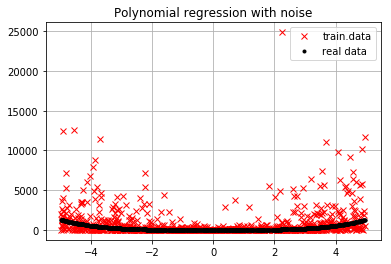

In [8]:
plt.plot(x.data,y1_noise.data,'rx')
plt.plot(x.data,y1.data,'k.')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression with noise')
plt.grid(True)
plt.show()

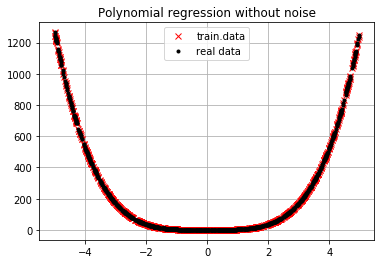

In [9]:
plt.plot(x.data,y1.cpu().data,'rx')
plt.plot(x.data,y1.data,'k.')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression without noise')
plt.grid(True)
plt.show()

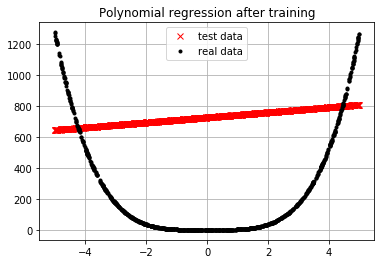

In [10]:
plt.plot(test_data.data,model(test_data).data,'rx') 
plt.plot(test_data.data,2*(test_data)**4 + (test_data)**2,'k.')
plt.legend(['test data','real data'])
plt.title('Polynomial regression after training')
plt.grid(True)
plt.show()

## y2 함수

In [11]:
label = y2_noise
losses2 = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
    losses2.append(loss.data)

param_list=list(model.parameters())
print(param_list[0].item(),param_list[1].item())

tensor(510275.6250)
tensor(340087.3125)
tensor(227117.9844)
tensor(151711.3125)
tensor(101365.6016)
tensor(67751.6250)
tensor(45308.8086)
tensor(30324.5742)
tensor(20320.1621)
tensor(13640.5762)
tensor(9180.8662)
tensor(6203.2852)
tensor(4215.2651)
tensor(2887.9351)
tensor(2001.7258)
tensor(1410.0356)
tensor(1014.9863)
tensor(751.2269)
tensor(575.1243)
tensor(457.5471)
tensor(379.0452)
tensor(326.6323)
tensor(291.6382)
tensor(268.2738)
tensor(252.6744)
tensor(242.2592)
tensor(235.3054)
tensor(230.6626)
tensor(227.5627)
tensor(225.4931)
tensor(224.1113)
tensor(223.1887)
tensor(222.5727)
tensor(222.1614)
tensor(221.8868)
tensor(221.7035)
tensor(221.5811)
tensor(221.4994)
tensor(221.4448)
tensor(221.4084)
tensor(221.3840)
tensor(221.3678)
tensor(221.3570)
tensor(221.3497)
tensor(221.3449)
tensor(221.3417)
tensor(221.3395)
tensor(221.3381)
tensor(221.3371)
tensor(221.3365)
1.069970965385437 11.932466506958008


In [12]:
num_test_data = 1000
test_data = init.uniform_(torch.Tensor(num_test_data,1),-5,5)
# print(test_data, model(test_data))

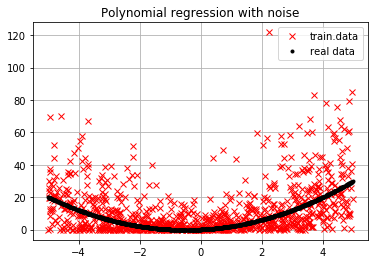

In [13]:
plt.plot(x.data,y2_noise.cpu().data,'rx')
plt.plot(x.data,y2.data,'k.')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression with noise')
plt.grid(True)
plt.show()

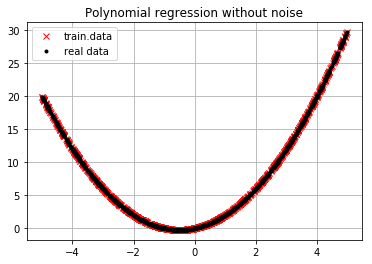

In [14]:
plt.plot(x.data,y2.data,'rx')
plt.plot(x.data,y2.data,'k.')
plt.legend(['train.data','real data'])
plt.title('Polynomial regression without noise')
plt.grid(True)
plt.show()

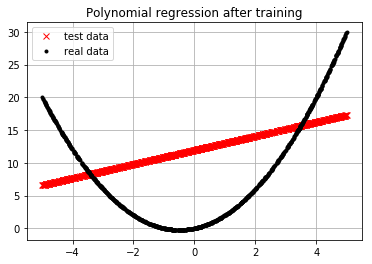

In [15]:
plt.plot(test_data.data,model(test_data).data,'rx') 
plt.plot(test_data.data,(test_data)**2 + (test_data),'k.')
plt.legend(['test data','real data'])
plt.title('Polynomial regression after training')
plt.grid(True)
plt.show()

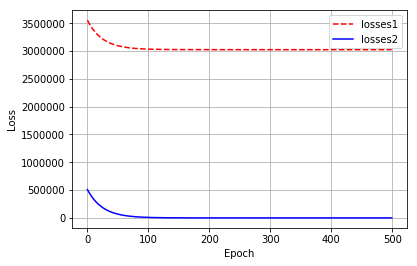

In [16]:
plt.plot(losses1, 'r--')
plt.plot(losses2, 'b-')
plt.legend(['losses1', 'losses2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

#### 결론 : 최적화는 y1보다 y2가 더 빨리되고 잘 된다. 그리고 y1은 gradient의 오류로 나중에가면 방향을 잃어 제자리를 도는 모습을 보이지만, y2는 잘 일어나고 있다. training파트가 잘 이해가 안된다 ㅠㅠ